In [1]:
using JLD2
using Plots
using LaTeXStrings
using LinearAlgebra
using DelimitedFiles
using CurveFit

In [2]:
NLL = Vector{Float64}[]
for i in 1:3
    NLL_l = load_object("NLL_l$(i)")
    push!(NLL, NLL_l)
end

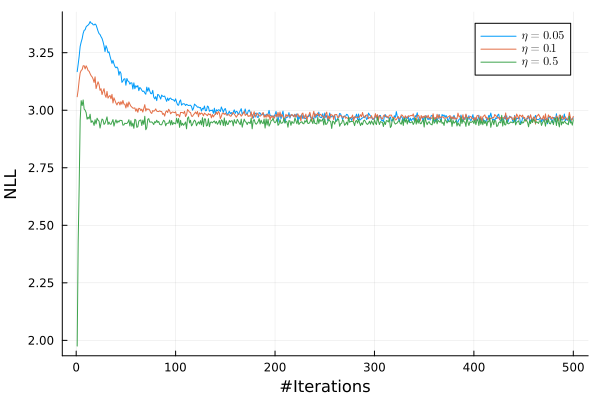

In [3]:
steps = collect(1:500)
plot(steps, NLL, xlabel = "#Iterations", ylabel = "NLL", ms = 2.5,
    label = [L"$\eta = 0.05$" L"$\eta = 0.1$" L"$\eta = 0.5$"])

In [ ]:
savefig("NLL.pdf")

In [6]:
H = Vector{Float64}[]
for i in 1:3
    h_l = load_object("h_l$(i)")
    push!(H, h_l)
end
h = load_object("h_actual");

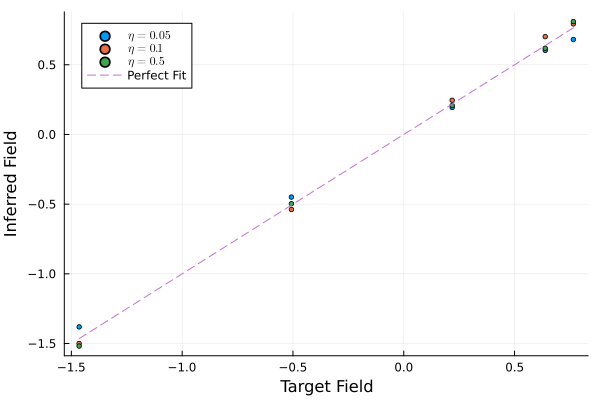

In [7]:
H2 = vcat(H...)
labels = [L"$\eta = 0.05$" L"$\eta = 0.1$" L"$\eta = 0.5$"]
p1 = scatter(h, H, xlabel = "Target Field", ylabel = "Inferred Field", label = labels, ms = 2.5)
plot!([minimum(h), maximum(h)], [minimum(h), maximum(h)], line=:dash, label="Perfect Fit")

In [ ]:
savefig("h_fit_rates.pdf")

In [16]:
j = Matrix{Float64}[]
for i in 1:3
    J_l = load_object("J_l$(i)")
    push!(j, J_l)
end
J = load_object("J_actual");

In [17]:
P = Any[]
for i in 1:3
    push!(P, scatter(J, j[i], xlabel = "Target Coupling", ylabel = "Inferred Coupling",
            colour =:blue, legend =:false, title = labels[i], ms = 2.5))

    plot!([minimum(J), maximum(J)], [minimum(J), maximum(J)], 
        line=:dash, label="Perfect Fit")
end

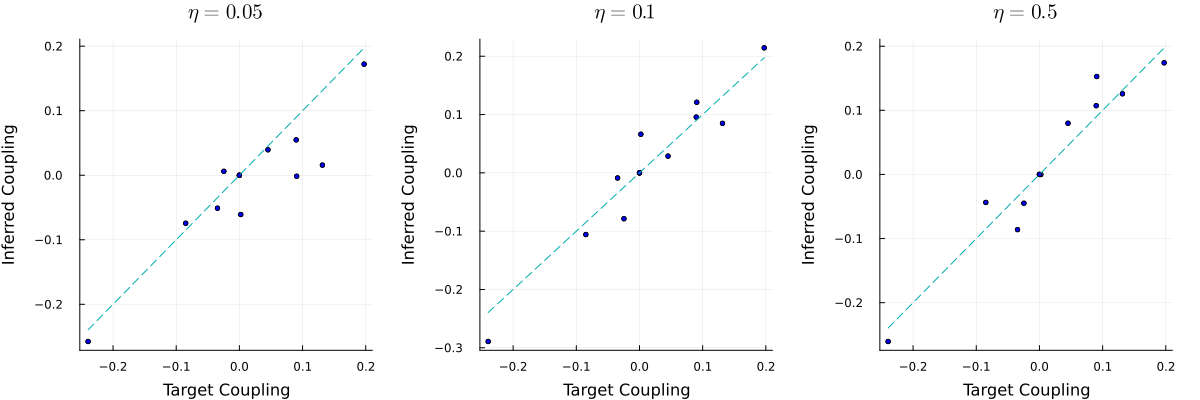

In [18]:
plot(P[1], P[2], P[3], layout = (1,3), size = (1200,400), margin = 5*Plots.mm)

In [ ]:
savefig("J_fit_rates.pdf")

In [21]:
NLL = Vector{Float64}[]
for i in 1:3
    NLL_l = load_object("NLL_S_l$(i)")
    push!(NLL, NLL_l)
end

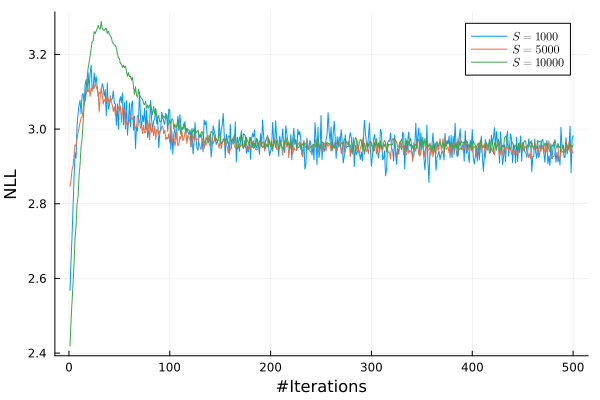

In [22]:
steps = collect(1:500)
plot(steps, NLL, xlabel = "#Iterations", ylabel = "NLL", ms = 2.5, 
    label = [L"$S = 1000$" L"$S = 5000$" L"$S = 10000$"])

In [ ]:
savefig("NLL_S.pdf")

In [24]:
H = Vector{Float64}[]
for i in 1:3
    h_l = load_object("h_S_l$(i)")
    push!(H, h_l)
end

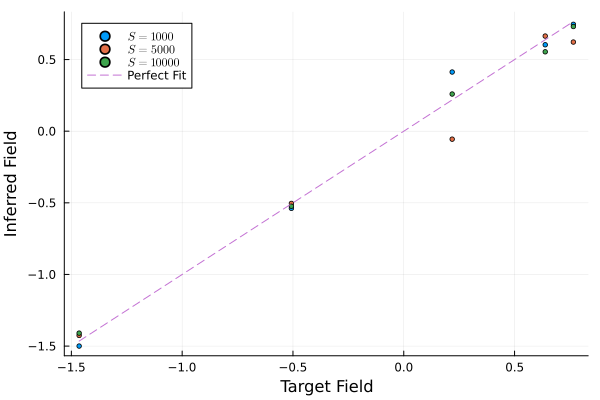

In [25]:
H2 = vcat(H...)
labels = [L"$S = 1000$" L"$S = 5000$" L"$S = 10000$"]
p1 = scatter(h, H, xlabel = "Target Field", ylabel = "Inferred Field", label = labels, ms = 2.5)
plot!([minimum(h), maximum(h)], [minimum(h), maximum(h)], line=:dash, label="Perfect Fit")

In [ ]:
savefig("h_fit_samples.pdf")

In [27]:
j = Matrix{Float64}[]
for i in 1:3
    J_l = load_object("J_S_l$(i)")
    push!(j, J_l)
end

In [28]:
P = Any[]
for i in 1:3
    push!(P, scatter(J, j[i], xlabel = "Target Coupling", ylabel = "Inferred Coupling",
            colour =:blue, title = labels[i], legend =:false, ms = 2.5))

    plot!([minimum(J), maximum(J)], [minimum(J), maximum(J)], 
        line=:dash, label="Perfect Fit")
end

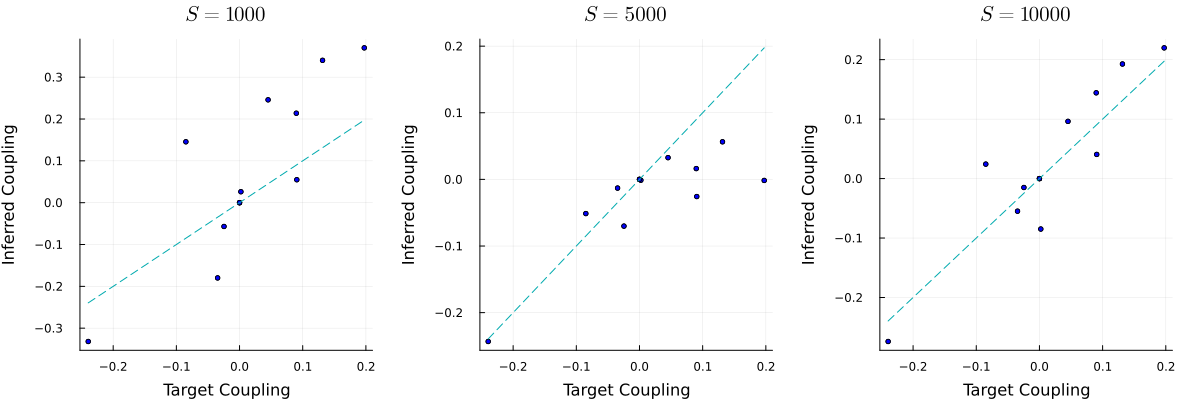

In [29]:
plot(P[1], P[2], P[3], layout = (1,3), size = (1200,400), margin = 5*Plots.mm)

In [ ]:
savefig("J_fit_samples.pdf")

In [31]:
M = load_object("Magnetisation")
C = load_object("CorrelationMatrix")
m = load_object("mag_inf")
Cij = load_object("corr_inf");

In [35]:
P1 = scatter(M, vec(m), xlabel = L"Test $\langle s_i \rangle$", ms = 2.5, 
    ylabel = L"Inferred $\langle s_i \rangle$", label = "")
plot!([minimum(M), maximum(M)], [minimum(M), maximum(M)], 
    line=:dash, label="Perfect Fit")

P2 = scatter(C, Cij, xlabel = "Test Correlations", ylabel = "Inferred Correlations", 
    label = "", ms = 2.5)
plot!([minimum(C), maximum(C)], [minimum(C), maximum(C)], 
    line=:dash, label="Perfect Fit")

plot(P1, P2, layout = (1,2), size = (1000, 400), margin = 3*Plots.mm);

In [ ]:
savefig("Salamander_fits_eqbm.pdf")

In [41]:
ha = load_object("ha_actual")
h_l2 = load_object("ha_l")
J_l2 = load_object("Ja_l")
NLL_l2 = load_object("NLLa_l")
Ja = load_object("Ja_actual");

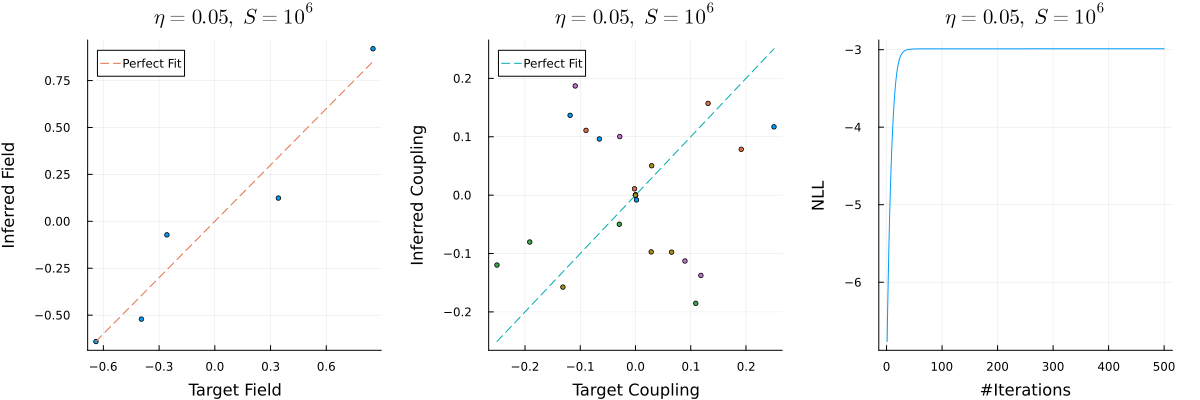

In [42]:
p1 = scatter(ha, h_l2, xlabel = "Target Field", ylabel = "Inferred Field", 
    label = "", title = L"$\eta = 0.05, \ S = 10^6$", ms = 2.5)
plot!([minimum(ha), maximum(ha)], [minimum(ha), maximum(ha)], line=:dash, label="Perfect Fit")

p2 = scatter(Ja, J_l2, xlabel = "Target Coupling", ylabel = "Inferred Coupling", 
    title = L"$\eta = 0.05, \ S = 10^6$", label = "", ms = 2.5)
plot!([minimum(Ja), maximum(Ja)], [minimum(Ja), maximum(Ja)], line=:dash, label="Perfect Fit")

steps = collect(1:500)
p3 = plot(steps, NLL_l2, xlabel = "#Iterations", ylabel = "NLL", 
    ms = 2.5, title = L"$\eta = 0.05, \ S = 10^6$", label = "")

plot(p1, p2, p3, layout = (1,3), size = (1200,400), margin = 5*Plots.mm)

In [ ]:
savefig("fits_glauber.pdf")

In [28]:
Ctest = load_object("Ctest")
Cs = load_object("Cs")
Ca = load_object("Ca")
NLL_2 = load_object("NLL2_inf")
NLL_3 = load_object("NLL3_inf");

In [29]:
Q1 = scatter(Ctest, Ca, xlabel = "Test Correlations", ylabel = "Inferred Correlations", 
    label = "", ms = 2.5)
plot!([minimum(Ctest), maximum(Ctest)], [minimum(Ctest), maximum(Ctest)], 
    line=:dash, label="Perfect Fit")

Q2 = scatter(Ctest, Cs, xlabel = "Test Correlations", ylabel = "Inferred Correlations", 
    label = "", ms = 2.5)
plot!([minimum(Ctest), maximum(Ctest)], [minimum(Ctest), maximum(Ctest)], 
    line=:dash, label="Perfect Fit")

plot(Q1, Q2, layout = (1,2), size = (1000,400), margin = 5*Plots.mm);

In [ ]:
savefig("correlations_glauber.pdf")

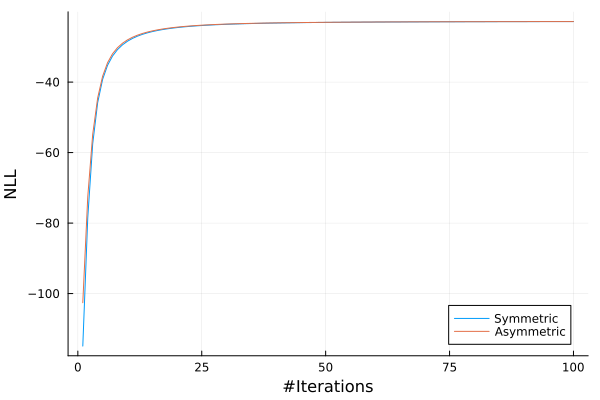

In [31]:
Q3 = plot(collect(1:100), [NLL_2, NLL_3], xlabel = "#Iterations", ylabel = "NLL", 
    ms = 2.5, label = ["Symmetric" "Asymmetric"])

In [ ]:
savefig("NLL_glauber.pdf")

In [ ]:
Cijk = load_object("sss_train")
Cijk_test = load_object("sss_test");

scatter(Cijk_test, Cijk, xlabel = "Test Triplets", ylabel = "Inferred Triplets", ms = 2.5, label = "")
plot!([minimum(Cijk_test), maximum(Cijk_test)], [minimum(Cijk_test), maximum(Cijk_test)], 
    line=:dash, label="Perfect Fit")
savefig("sss.pdf")